In [1]:
import uproot
import yaml
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import sys
sys.path.append('../')

from tqdm.notebook import tqdm

### load config

In [2]:
config_path_t = 'path_to_multipart_train.yml'
with open(config_path_t, 'r') as stream:
    config_t = yaml.safe_load(stream)

config_path_mv = 'path_multipart_model_and_var.yml'
with open(config_path_mv, 'r') as stream:
    config_mv = yaml.safe_load(stream)

In [3]:
res_factor = config_t['res_factor']

In [4]:
fp = config_t['train_path']
tree_low = uproot.open(fp)['Low_Tree']
tree_high = uproot.open(fp)['High_Tree']
n_events = tree_low.num_entries
n_events

1000000

In [5]:
e_start, e_stop = 0, 500_000

In [6]:
high_e_true = tree_high['cell_e'].array(library='np', entry_start=e_start, entry_stop=e_stop)
high_layer  = tree_high['cell_layer'].array(library='np', entry_start=e_start, entry_stop=e_stop)

In [7]:
high_e_true_flatten = np.hstack(high_e_true)
high_layer_flatten = np.hstack(high_layer)

### cardinality

In [8]:
n_cells = np.array([len(x[l<=2]) for x, l in zip(high_e_true, high_layer)])
n_cells_zero_e = np.array([(x[l<=2] == 0).sum() for x, l in zip(high_e_true, high_layer)])
n_cells_nonzero_e = np.array([(x[l<=2] != 0).sum() for x, l in zip(high_e_true, high_layer)])

In [11]:
np.argmax(n_cells), n_cells[np.argmax(n_cells)]

(73182, 3280)

/tmp/ipykernel_176731/4127096036.py:17: RuntimeWarning: invalid value encountered in divide
  frac_zero = n_cells_zero_e / n_cells
/tmp/ipykernel_176731/4127096036.py:18: RuntimeWarning: invalid value encountered in divide
  frac_nonzero = n_cells_nonzero_e / n_cells


Text(0.5, 0, 'fraction')

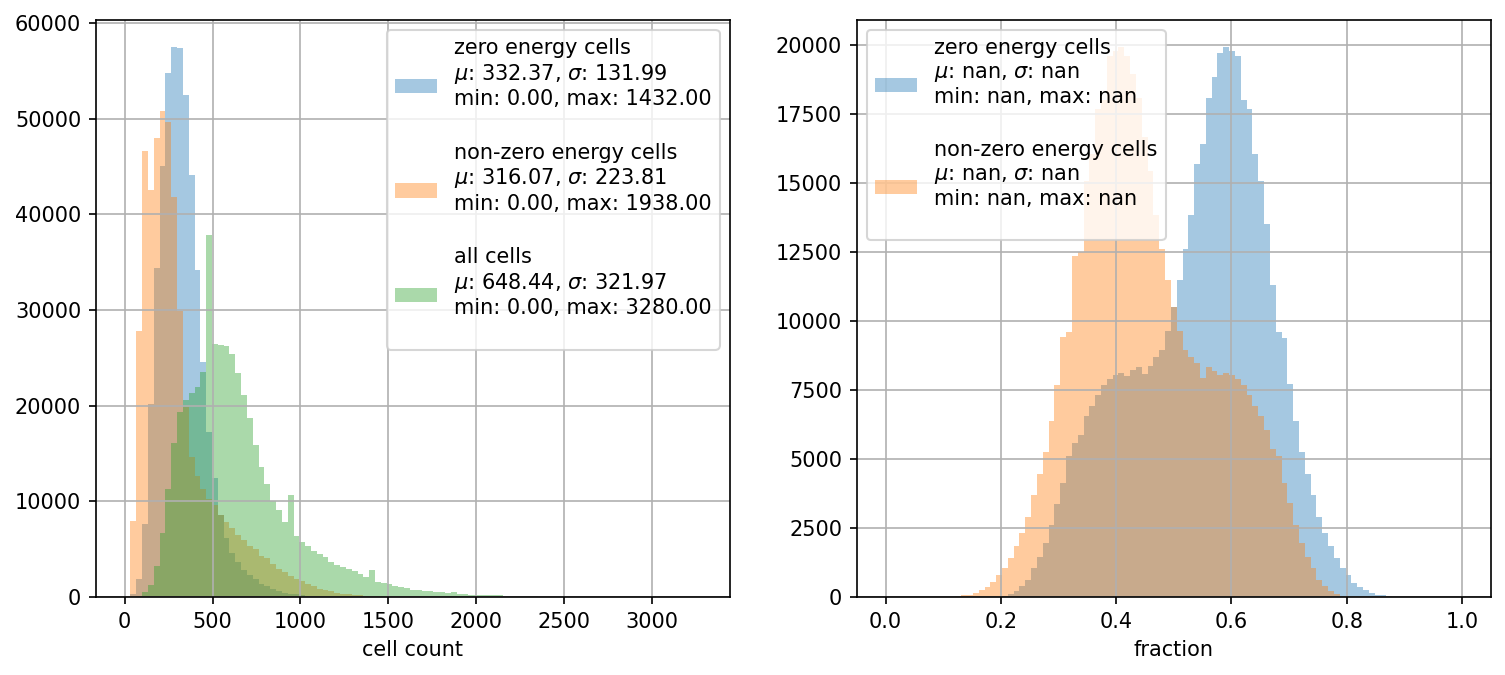

In [9]:
fig = plt.figure(figsize=(12, 5), dpi=150)

def get_label(x):
    return f'$\mu$: {x.mean():.2f}, $\sigma$: {x.std():.2f}\nmin: {x.min():.2f}, max: {x.max():.2f}\n'

ax = fig.add_subplot(121)
bins = np.linspace(0, max(n_cells), 100)
ax.hist(n_cells_zero_e, bins=bins, histtype='stepfilled', alpha=0.4, label='zero energy cells\n'+get_label(n_cells_zero_e))
ax.hist(n_cells_nonzero_e, bins=bins, histtype='stepfilled', alpha=0.4, label='non-zero energy cells\n'+get_label(n_cells_nonzero_e))
ax.hist(n_cells, bins=bins, histtype='stepfilled', alpha=0.4, label='all cells\n'+get_label(n_cells))
ax.grid()
ax.legend()
ax.set_xlabel('cell count')


ax = fig.add_subplot(122)
frac_zero = n_cells_zero_e / n_cells
frac_nonzero = n_cells_nonzero_e / n_cells
bins = np.linspace(0, 1, 100)
ax.hist(frac_zero, bins=bins, histtype='stepfilled', alpha=0.4, label='zero energy cells\n'+get_label(frac_zero))
ax.hist(frac_nonzero, bins=bins, histtype='stepfilled', alpha=0.4, label='non-zero energy cells\n'+get_label(frac_nonzero))
ax.legend()
ax.grid()
ax.set_xlabel('fraction')